# Import Scikit-Learn, Pandas and Numpy

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LinearRegression, BayesianRidge, LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor

from scipy.stats import norm, skew

# 1. Import Training Data and Testing using Pandas

In [2]:
train = pd.read_csv('/content/sample_data/train.csv')
test = pd.read_csv('/content/sample_data/test.csv')

In [3]:
train.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test.head(5) # casual and registered columns are in the training dataset but not in the testing dataset so, should be dropped 

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


# 2. Exploratory Data Analysis

### Explore missing data

In [5]:
train_nulls = (train.isnull().sum() / len(train)) * 100
train_nulls = train_nulls[train_nulls > 0]
missing_data_train = pd.DataFrame({'Missing Ratio %' :train_nulls}).sort_values(
    'Missing Ratio %', ascending=False)
missing_data_train # No Missing Data

,Missing Ratio %


In [6]:
test_nulls = (test.isnull().sum() / len(train)) * 100
test_nulls = test_nulls[test_nulls > 0]
missing_data_test = pd.DataFrame({'Missing Ratio %' :test_nulls}).sort_values(
    'Missing Ratio %', ascending=False)
missing_data_test

,Missing Ratio %


In [7]:
train.info() # Check Datatypes and Dataset Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


### Explore numeric features' statistics

In [9]:
train.describe() # Check Dataset Statistics

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


### Explore features' distributions

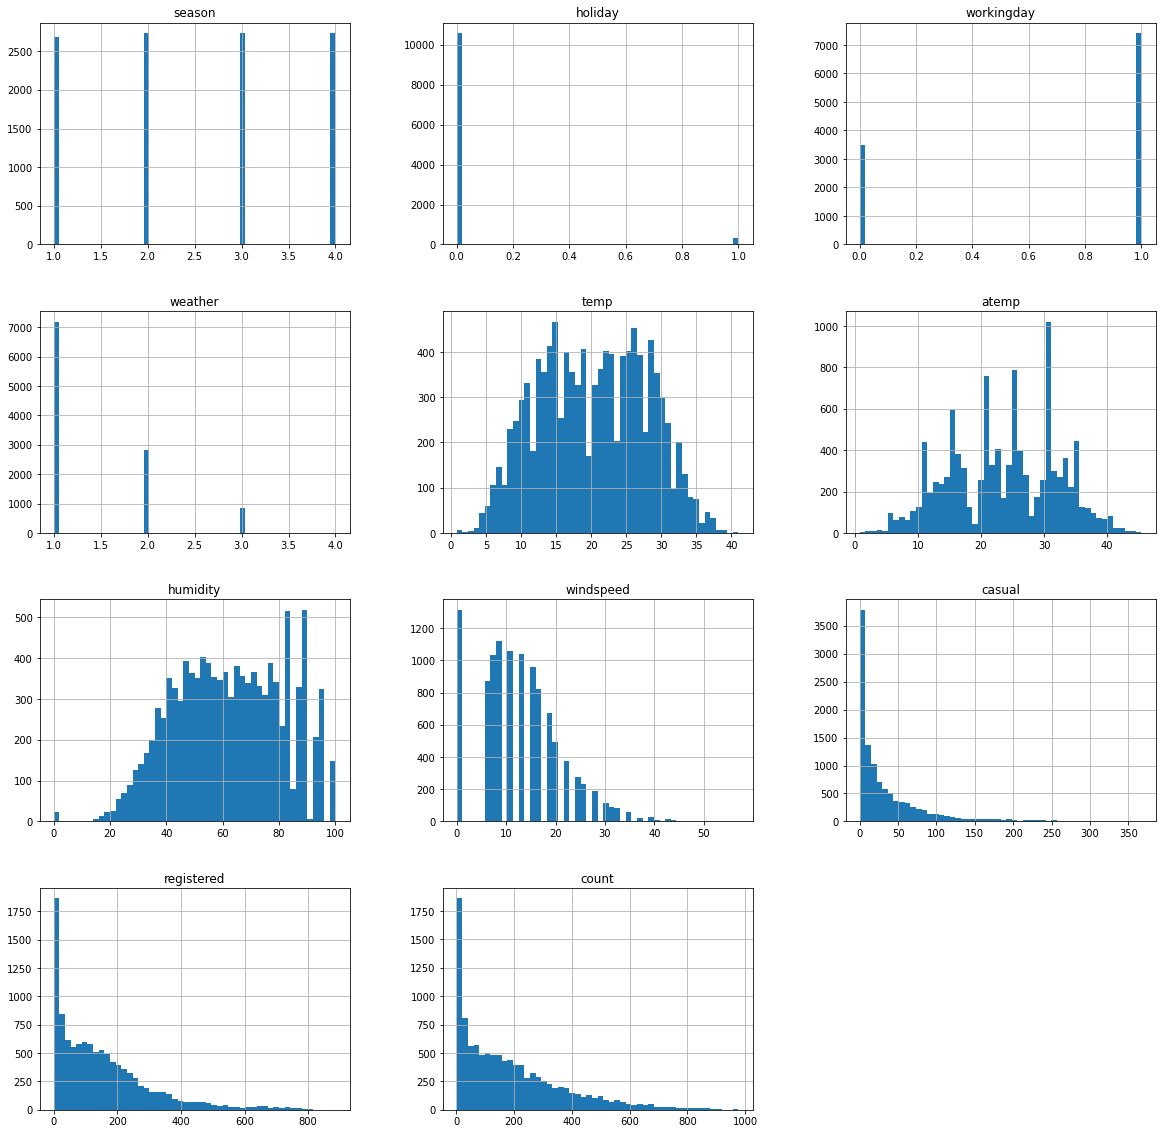

In [10]:
train.hist(bins=50, figsize=(20,20))
plt.show()

In [11]:
# Wind speed is right skewed so, should be transformed using log 
train['windspeed'] = np.log1p(train['windspeed'])
test['windspeed'] = np.log1p(test['windspeed'])

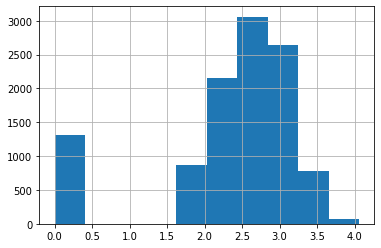

In [12]:
train['windspeed'].hist() # Check distribution after transformation

# Data Visualization

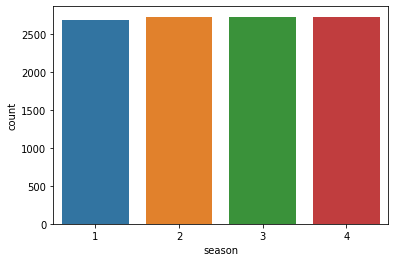

In [13]:
sns.countplot(x='season', data=train) 

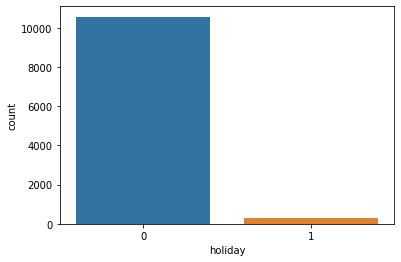

In [14]:
sns.countplot(x='holiday', data=train)

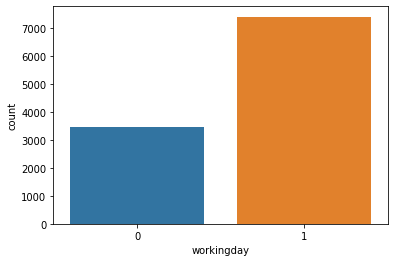

In [15]:
sns.countplot(x='workingday', data=train)

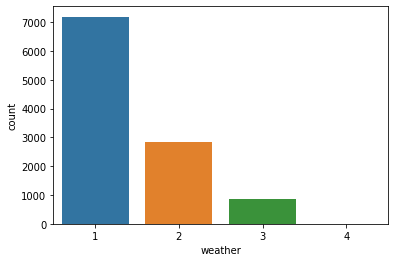

In [16]:
sns.countplot(x='weather', data=train)

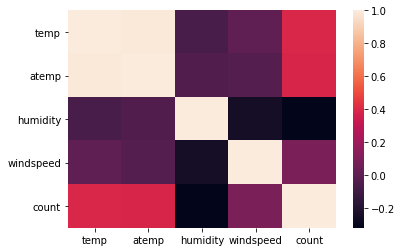

In [17]:
# Check the correlation Matrix 
correlation_Matrix = train[["temp","atemp","humidity","windspeed","count"]].corr()
sns.heatmap(correlation_Matrix)

### Analyzing target variable

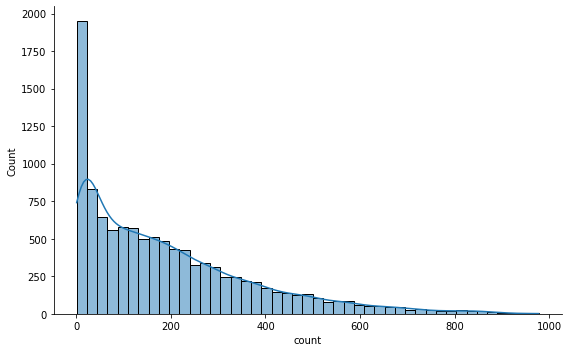

In [18]:
sns.displot(train['count'] , kde=True, height=5, aspect=8/5) # Traget variable is right skewed so should be transformed

In [19]:
train['count_sqrt'] = np.sqrt(train['count']) # sqrt is used to alter the distribution 

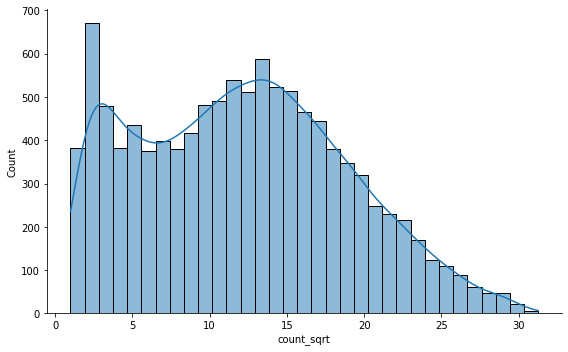

In [20]:
sns.displot(train['count_sqrt'] , kde=True, height=5, aspect=8/5)

# 3. Data Preprocessing

In [21]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_sqrt
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,4.000000
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,6.324555
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,5.656854
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3.605551
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1.000000


In [22]:
# Extract hour, Day, Month, Year 
train["hour"] = [t.hour for t in pd.DatetimeIndex(train.datetime)]
train["day"] = [t.dayofweek for t in pd.DatetimeIndex(train.datetime)]
train["month"] = [t.month for t in pd.DatetimeIndex(train.datetime)]
train['year'] = [t.year for t in pd.DatetimeIndex(train.datetime)]
train['year'] = train['year'].map({2011:0, 2012:1})
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_sqrt,hour,day,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,4.000000,0,5,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,6.324555,1,5,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,5.656854,2,5,1,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3.605551,3,5,1,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1.000000,4,5,1,0


In [23]:
test["hour"] = [t.hour for t in pd.DatetimeIndex(test.datetime)]
test["day"] = [t.dayofweek for t in pd.DatetimeIndex(test.datetime)]
test["month"] = [t.month for t in pd.DatetimeIndex(test.datetime)]
test['year'] = [t.year for t in pd.DatetimeIndex(test.datetime)]
test['year'] = test['year'].map({2011:0, 2012:1})
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day,month,year
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,3.295937,0,3,1,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.000000,1,3,1,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.000000,2,3,1,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,2.485023,3,3,1,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,2.485023,4,3,1,0


In [24]:
# Drop casual, registered columns that were not available in the test set. 
# Drop unnecessary columns 
train = train.drop(columns=['casual', 'registered', 'datetime', 'count'])

### Extract numerical and categorical features (nominal and ordinal)

In [25]:
numerical_features = [x for x in train.select_dtypes(include='number').columns if x not in ['count_sqrt']]
categorical_features = train.select_dtypes(exclude='number').columns.tolist()
label = ['count_sqrt']

# 4. Train-Validation split

In [26]:
train_df, val_df = train_test_split(train, test_size=0.1, random_state=42)

X_train = train_df.drop(columns=label)
y_train = train_df[label]

X_val = val_df.drop(columns=label[0])
y_val = val_df[label]
X_test = test.drop(columns=['datetime'])
features = [X_train.columns]

# 5. Modelling

In [27]:
# Use Random Forest Regressor
model = Pipeline(
    steps=[
        ('Standard_Scalar', StandardScaler()),
        ('Regressor', RandomForestRegressor())
    ])

In [28]:
model.fit(X_train, np.ravel(y_train))

set_config(display='diagram')
model

Pipeline(steps=[('Standard_Scalar', StandardScaler()),
                ('Regressor', RandomForestRegressor())])

In [29]:
def pipeline_prediction_plot(feature, label, pipeline):    
    # Use the fitted pipeline to make predictions on the train dataset
    train_predictions = pipeline.predict(X_train)

    # Use the fitted pipeline to make predictions on the test dataset
    test_predictions = pipeline.predict(X_val)

    sns.regplot(x=y_train, y=train_predictions, scatter_kws={'alpha':1, 'color':'brown'})
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title("Training Set")
    plt.show()

    sns.regplot(x=y_val, y=test_predictions, scatter_kws={'alpha':1, 'color':'r'})
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title("Test Set")
    plt.show()
    
    housing_predictions = pipeline.predict(X_val)
    lin_rmse = r2_score(y_val, housing_predictions)
    print("r2_score = ", lin_rmse)


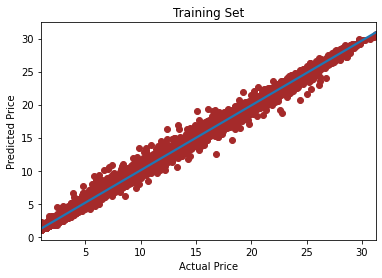

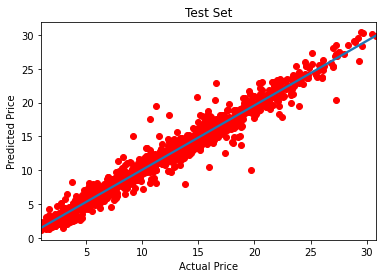

r2_score =  0.9637368991381375


In [30]:
pipeline_prediction_plot(features, label, model)

# 5. Submission

In [31]:
sub = pd.DataFrame()
sub['datetime'] = test['datetime']
sub['count'] = (model.predict(X_test))**2
sub.to_csv('submission.csv', index=False)